# NLP PROJECT


## Notebook II: Exploratory Data Analysis:

After the data cleaning step where we put the data into a few standard formats, the next step is to take a look at the data and see if it makes sense. Before applying any algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. It is the same when working with text data. We will find some more obvious patterns with EDA before identifying the hidden patterns with machine learning (ML) techniques. We are going to look at the following for each book:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words
3. **Amount of profanity** - most common terms

### I. Most Common Words:

#### Analysis:

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,AF,BoP,FbR,SitG,TBS
aah,0,0,0,1,0
abhorrent,0,0,0,1,0
abiding,0,0,1,0,0
abilities,2,0,1,2,0
ability,4,1,7,6,0


In [2]:
# Find the top 30 words said for each book
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'AF': [('book', 100),
  ('taleb', 59),
  ('antifragile', 51),
  ('read', 45),
  ('people', 41),
  ('fragile', 39),
  ('like', 37),
  ('author', 36),
  ('idea', 34),
  ('just', 34),
  ('ideas', 33),
  ('systems', 28),
  ('really', 26),
  ('dont', 24),
  ('things', 23),
  ('did', 22),
  ('time', 22),
  ('stress', 21),
  ('reading', 21),
  ('example', 21),
  ('point', 20),
  ('good', 20),
  ('makes', 20),
  ('life', 19),
  ('long', 19),
  ('world', 19),
  ('antifragility', 19),
  ('does', 19),
  ('fragility', 18),
  ('small', 18)],
 'BoP': [('book', 72),
  ('aphorisms', 50),
  ('taleb', 48),
  ('life', 24),
  ('procrustes', 20),
  ('bed', 20),
  ('like', 18),
  ('know', 17),
  ('good', 17),
  ('people', 15),
  ('read', 15),
  ('knowledge', 14),
  ('think', 14),
  ('black', 13),
  ('talebs', 13),
  ('books', 13),
  ('dont', 13),
  ('great', 13),
  ('little', 12),
  ('world', 12),
  ('interesting', 11),
  ('randomness', 11),
  ('reading', 11),
  ('author', 10),
  ('say', 10),
  ('wisdom', 

In [3]:
# Print the top 15 words said for each book
for book_reviews, top_words in top_dict.items():
    print(book_reviews)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

AF
book, taleb, antifragile, read, people, fragile, like, author, idea, just, ideas, systems, really, dont
---
BoP
book, aphorisms, taleb, life, procrustes, bed, like, know, good, people, read, knowledge, think, black
---
FbR
book, taleb, people, read, think, like, randomness, author, just, life, success, make, does, time
---
SitG
book, taleb, game, skin, people, author, like, ideas, time, risk, talebs, make, good, does
---
TBS
book, read, black, taleb, like, swan, things, author, know, people, think, time, make, just
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do that first.

In [4]:
# Look at the most common top words and add them to the stop word list
from collections import Counter

# Let's first pull out the top words for all books' reviews
words = []
for book_reviews in data.columns:
    top = [word for (word, count) in top_dict[book_reviews]]
    for t in top:
        words.append(t)
        
words

['book',
 'taleb',
 'antifragile',
 'read',
 'people',
 'fragile',
 'like',
 'author',
 'idea',
 'just',
 'ideas',
 'systems',
 'really',
 'dont',
 'things',
 'did',
 'time',
 'stress',
 'reading',
 'example',
 'point',
 'good',
 'makes',
 'life',
 'long',
 'world',
 'antifragility',
 'does',
 'fragility',
 'small',
 'book',
 'aphorisms',
 'taleb',
 'life',
 'procrustes',
 'bed',
 'like',
 'know',
 'good',
 'people',
 'read',
 'knowledge',
 'think',
 'black',
 'talebs',
 'books',
 'dont',
 'great',
 'little',
 'world',
 'interesting',
 'randomness',
 'reading',
 'author',
 'say',
 'wisdom',
 'gives',
 'theme',
 'process',
 'best',
 'book',
 'taleb',
 'people',
 'read',
 'think',
 'like',
 'randomness',
 'author',
 'just',
 'life',
 'success',
 'make',
 'does',
 'time',
 'really',
 'world',
 'talebs',
 'reading',
 'great',
 'ideas',
 'trader',
 'work',
 'fact',
 'nassim',
 'events',
 'wrong',
 'market',
 'black',
 'makes',
 'things',
 'book',
 'taleb',
 'game',
 'skin',
 'people',
 'aut

In [5]:
# Let's aggregate this list and identify the most common words along with how many times they occur per book
Counter(words).most_common()

[('book', 5),
 ('taleb', 5),
 ('read', 5),
 ('people', 5),
 ('like', 5),
 ('author', 5),
 ('just', 4),
 ('dont', 4),
 ('things', 4),
 ('time', 4),
 ('reading', 4),
 ('good', 4),
 ('life', 4),
 ('does', 4),
 ('think', 4),
 ('ideas', 3),
 ('really', 3),
 ('world', 3),
 ('black', 3),
 ('talebs', 3),
 ('make', 3),
 ('example', 2),
 ('makes', 2),
 ('know', 2),
 ('books', 2),
 ('great', 2),
 ('randomness', 2),
 ('events', 2),
 ('lot', 2),
 ('better', 2),
 ('way', 2),
 ('antifragile', 1),
 ('fragile', 1),
 ('idea', 1),
 ('systems', 1),
 ('did', 1),
 ('stress', 1),
 ('point', 1),
 ('long', 1),
 ('antifragility', 1),
 ('fragility', 1),
 ('small', 1),
 ('aphorisms', 1),
 ('procrustes', 1),
 ('bed', 1),
 ('knowledge', 1),
 ('little', 1),
 ('interesting', 1),
 ('say', 1),
 ('wisdom', 1),
 ('gives', 1),
 ('theme', 1),
 ('process', 1),
 ('best', 1),
 ('success', 1),
 ('trader', 1),
 ('work', 1),
 ('fact', 1),
 ('nassim', 1),
 ('wrong', 1),
 ('market', 1),
 ('game', 1),
 ('skin', 1),
 ('risk', 1),
 (

In [6]:
# If more than 3 of the book reviews have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 3]
add_stop_words

['book',
 'taleb',
 'read',
 'people',
 'like',
 'author',
 'just',
 'dont',
 'things',
 'time',
 'reading',
 'good',
 'life',
 'does',
 'think']

In [7]:
# Creating a list of custom stopwords and re-add the additional stop words
add_stop_words2 = ["nnt", "talebs", "hes", "chapter", "nassim", "sitg"]
add_stop_words.extend(add_stop_words2)

In [8]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.reviews)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [9]:
# Let's make word clouds
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

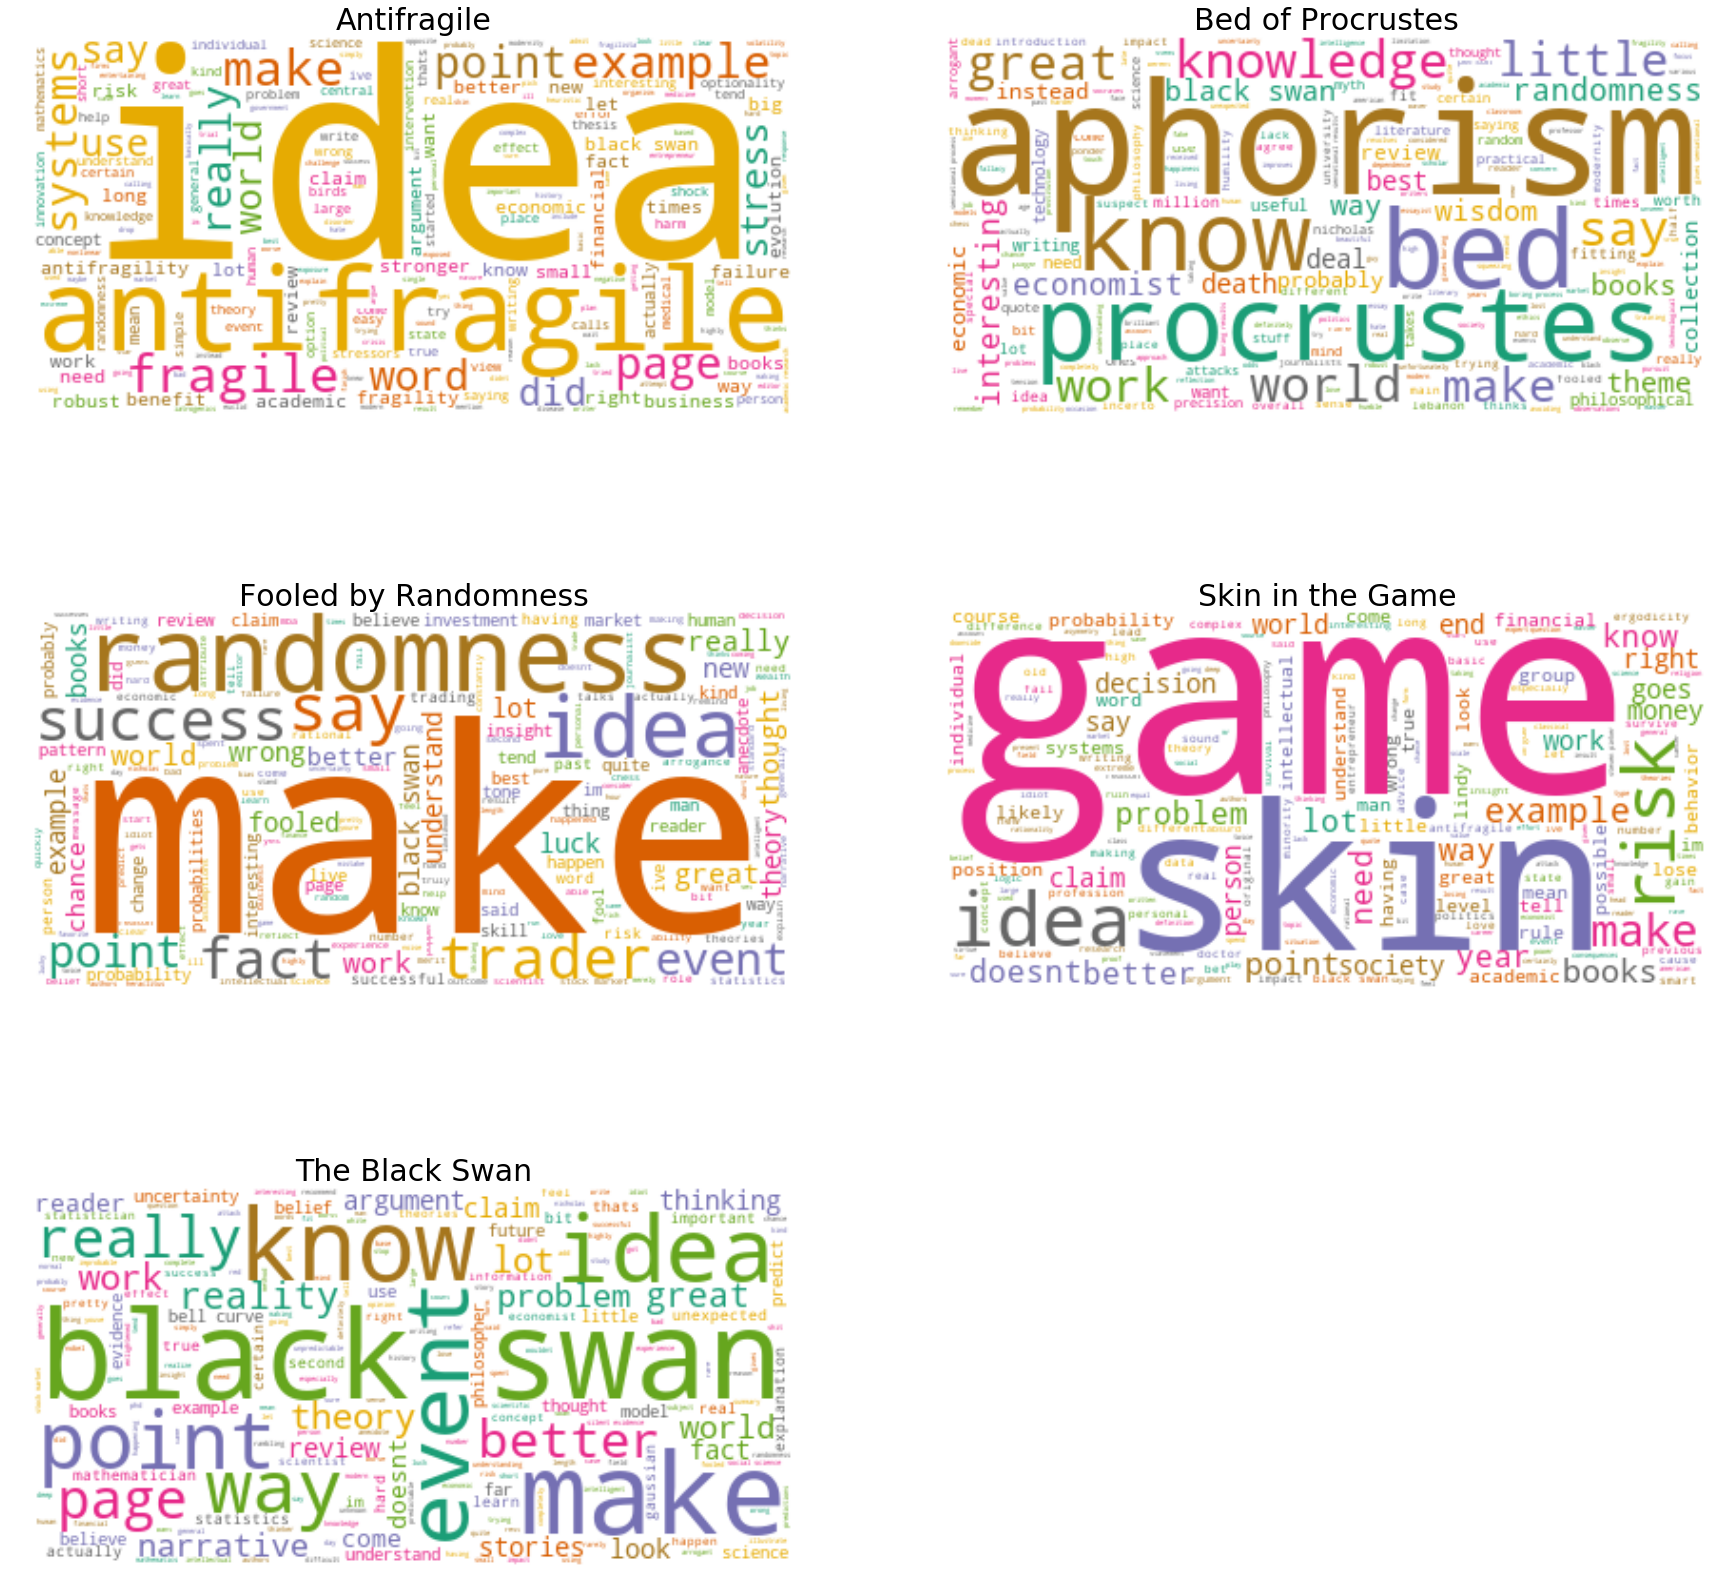

In [10]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 30]

full_names = ['Antifragile', 'Bed of Procrustes', 'Fooled by Randomness', 'Skin in the Game', 'The Black Swan']

# Create subplots for each book
for index, review in enumerate(data.columns):
    wc.generate(data_clean.reviews[review])
    
    plt.subplot(3, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index], size = 30)
    
plt.show()


#### Findings:

- We can notice that each book has their title in the top words meaning people reviewing either keep repeating the title or they are elaborating on the books' concepts by using Taleb's terminology.
- Each book's wordcloud seem to be about a certain facet to business, psychology and philosophy, which is sort of expected as it is an Incerto.
- To prove the second point, a lot of words converge on the topics of economics and philosophy (uncertainty, randomness, risk, trading, problems, ideas, theories, systems) which is a good start.  

### II. Number of Words:

#### Analysis: 

In [11]:
# Find the number of unique words that each book has

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for review in data.columns:
    uniques = data[review].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['reviews', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,reviews,unique_words
1,Bed of Procrustes,1420
2,Fooled by Randomness,2188
4,The Black Swan,2234
0,Antifragile,2753
3,Skin in the Game,3526


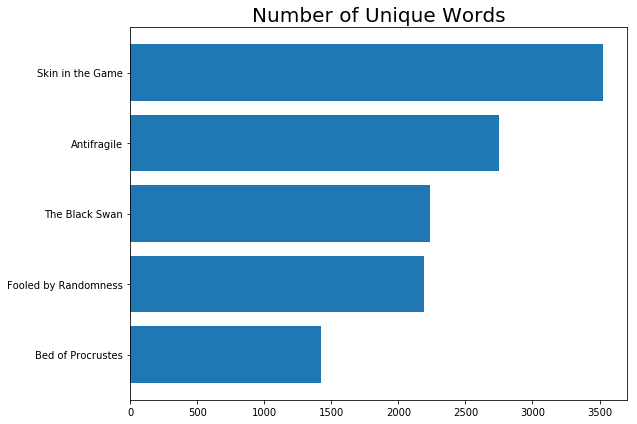

In [12]:
# Let's plot our findings
import numpy as np

plt.rcParams['figure.figsize'] = [16, 6]

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.reviews)
plt.title('Number of Unique Words', fontsize=20)

plt.tight_layout()
plt.show()

#### Findings:

- Antifragile and Fooled by Randomness have way more unique words in their reviews compared to the other 3 books.
- The Black Swan has the least amount of unique words, which is surprising considering the book's success. Maybe people have trouble with this book.

We could perform some extra analysis by comparing two different word counts and look at their scatter plot as well. The goal of this notebook was just to be able to take an initial look at the data and see if the results of some basic analysis made sense.

My conclusion is that it does for a first try. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams (which I will potentially look at in part III). Nevertheless, the wordclouds are interesting and make general sense, so we're going to move on.

The data science process is interative and in my opinion, it is better to see some non-perfect but acceptable results with this project to help me learn and make it worth it instead of having nothing.

## END OF NOTEBOOK II